## 1. Execute one of the following cell to pick AGs results to be plotted

### Specify 
- datasets that should be loaded, and the label you want to assign to them (eg GAN, GAN_versionXX ...)
- output directory name (will be created if needed)
- SNP position file(s)  
- number of individuals to keep from each dataset (will be randomly subampled if less than the total number)

## 2. Imports and general color dictionary

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import importlib
import os
from short import plot_utils as plu
dirscript = 'short'

In [3]:
repoDIR = "./"

DATA = "1KG"

if DATA == "1KG":
    samplesDIR = "../../results/1KG/8020"
    outDir = repoDIR + "FIGS/1KG/"
    nsub = 5008
    infiles = {'Real': samplesDIR + "/data/8020_test.hapt",
            'Truth': samplesDIR + "/data/8020_train.hapt",
            'Indep': samplesDIR + "/indep/10K_indep_8020_samples.hapt",
            'Markov':  samplesDIR + "/markov/10K_markov_8020_samples.hapt",
            'HMM': samplesDIR + "/hmm/10K_hmm_8020_samples3.hapt",
            'WGAN': samplesDIR + "/wgan/10K_wgan_8020_samples.hapt",
            'RBM': samplesDIR + "/rbm/10K_rbm_8020_samples.hapt",
            'PC': samplesDIR + "/hclt/10K_hclt_8020_samples.hapt"
            }
    realposfname = "../../aux/10K_SNP.legend"

elif DATA == "UKBB":
    samplesDIR = "../../results/UKBB/8020"
    outDir = repoDIR + "FIGS/UKBB/"
    nsub = 21540
    infiles = {'Real': samplesDIR + "/data/8020_test.hapt",
            'Truth': samplesDIR + "/data/8020_train.hapt",
            'Indep': samplesDIR + "/indep/UKBB_indep_8020_samples.hapt",
            'Markov':  samplesDIR + "/markov/UKBB_markov_8020_samples.hapt",
            'HMM': samplesDIR + "/hmm/UKBB_hmm_8020_samples.hapt",
            'WGAN': samplesDIR + "/wgan/UKBB_wgan_8020_samples.hapt",
            'RBM': samplesDIR + "/rbm/UKBB_rbm_8020_samples.hapt",
            'PC': samplesDIR + "/hclt/UKBB_hclt_8020_samples.hapt"
            }
    realposfname = "../../aux/UKBB_SNP.legend" 

# same SNP positions for all datasets so it is just repeated for all keys:
position_fname = {key:realposfname for key in infiles.keys()} 

print("- Datasets under study:\n", infiles)

# same SNP positions for all datasets so it is just repeated for all keys:
position_fname = {key:realposfname for key in infiles.keys()} 

- Datasets under study:
 {'Real': 'genetic_pc_github/results/1KG/8020/data/8020_test.hapt', 'Truth': 'genetic_pc_github/results/1KG/8020/data/8020_train.hapt', 'Indep': 'genetic_pc_github/results/1KG/8020/indep/10K_indep_8020_samples.hapt', 'Markov': 'genetic_pc_github/results/1KG/8020/markov/10K_markov_8020_samples.hapt', 'HMM': 'genetic_pc_github/results/1KG/8020/hmm/10K_hmm_8020_samples3.hapt', 'WGAN': 'genetic_pc_github/results/1KG/8020/wgan/10K_wgan_8020_samples.hapt', 'RBM': 'genetic_pc_github/results/1KG/8020/rbm/10K_rbm_8020_samples.hapt', 'PC': 'genetic_pc_github/results/1KG/8020/hclt/10K_hclt_8020_samples.hapt'}


- Output Directory for figures: ./FIGS/1KG/
 - Real dataset positions: genetic_pc_github/aux/10K_SNP.legend
 - Sample size:5008


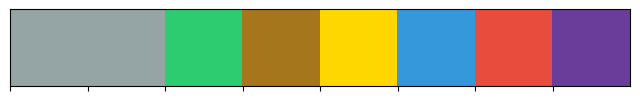

In [4]:
# General colors
allcolpal = dict({'Real':"#95a5a6",
                  'Truth': "#95a5a6",
                  'WGAN':"#3498db", 
                  'RBM':"#e74c3c", 
                  'Indep': "#2ecc71",
                  'Markov': "#a6761d",
                  'HMM': 'gold',
                  'PC': '#6a3d9a'
              })

# Update current color palette to the dataset type in infiles 
colpal =  {key:allcolpal[key] for key in infiles.keys()}
sns.set_palette(colpal.values())

sns.palplot(sns.color_palette())
print(f"- Output Directory for figures: {outDir}\n",
      f"- Real dataset positions: {realposfname}\n",
      f"- Sample size:{nsub}")


## 3. run notebook to plot all figures or a subset of sumstats (for faster results)

In [5]:
f"Figures will be saved in {outDir} or its subdirectories"

'Figures will be saved in ./FIGS/1KG/ or its subdirectories'

In [6]:
## Print one more time the name of datasets that will be loaded
## the path should exist otherwise you need to check that your setup is correct
for x in [f"- Input file {f} exists: {os.path.exists(f)}" for f in infiles.values()]:
    print(x)

- Input file genetic_pc_github/results/1KG/8020/data/8020_test.hapt exists: False
- Input file genetic_pc_github/results/1KG/8020/data/8020_train.hapt exists: False
- Input file genetic_pc_github/results/1KG/8020/indep/10K_indep_8020_samples.hapt exists: False
- Input file genetic_pc_github/results/1KG/8020/markov/10K_markov_8020_samples.hapt exists: False
- Input file genetic_pc_github/results/1KG/8020/hmm/10K_hmm_8020_samples3.hapt exists: False
- Input file genetic_pc_github/results/1KG/8020/wgan/10K_wgan_8020_samples.hapt exists: False
- Input file genetic_pc_github/results/1KG/8020/rbm/10K_rbm_8020_samples.hapt exists: False
- Input file genetic_pc_github/results/1KG/8020/hclt/10K_hclt_8020_samples.hapt exists: False


In [8]:
# Setup options (transformations, sumstats to compute etc) and output directory (automatically derived from maintOutDir)

importlib.reload(plu) # useful only if plot_utils is changed since you imported it for dev reason
boolComputeAATS = True # if False notebook 5 will reload previously computed AATS instead of computing it
figwi = 12 # control size of some figures 

# set allchecks to False for a first rapid scan
# set to True for computing/plotting all sumstats and scores (long, better on a cluster)
allchecks = False

# pick the transformations you want to apply to the datasets
# For no transformation choose 
# transformations=None
transformations={'to_minor_encoding':False, 'min_af': 0, 'max_af': 1}

if not transformations is None:
    tname=';'.join([f'{k}-{v}' for k,v in transformations.items()])
else:
    tname = 'none'
tname=tname + ';allchecks-' + str(int(allchecks)) + ';n-' + str(nsub)
outDir = outDir = os.path.join(outDir, tname+'/')
print(f"- Figures will be saved in {outDir}")
if os.path.exists(outDir):
    print('    - This directory exists, the following files might be overwritten:')
    print('    -', os.listdir(outDir))

- Figures will be saved in ./FIGS/1KG/to_minor_encoding-False;min_af-0;max_af-1;allchecks-0;n-5008/
    - This directory exists, the following files might be overwritten:
    - ['settings.json', 'AC_generated_vs_Real_zoom.pdf', 'AC_generated_vs_Real.pdf', 'PCA_allel_compare_models_Combined PCA.pdf', 'PCA_densities_compare_Combined PCA.pdf', 'PCA_allel_compare_models_Coupled PCA.pdf', 'PCA_densities_compare_Coupled PCA.pdf', 'wasserstein_PCA_coupled_PCA.csv', 'wasserstein2D_PCA_coupled_PCA.csv', 'scores_all_PCA.csv', 'LD_generated_vs_real_intersectSNP.pdf', 'correlation_vs_dist_intersectSNP.pdf', 'LD_HEATMAP_intersectSNP_bounds=None-None_mirror=True_diff=False.pdf', 'LD_HEATMAP_intersectSNP_bounds=None-None_mirror=True_diff=True.pdf', 'LD_HEATMAP_intersectSNP_bounds=None-None_mirror=False_diff=False.pdf', 'dist_Real_Real.npz', 'dist_Truth_Real.npz', 'dist_Truth_Truth.npz', 'dist_GAN_Real.npz', 'dist_GAN_GAN.npz', 'dist_RBM_Real.npz', 'dist_RBM_RBM.npz', 'dist_HCLT_Real.npz', 'dist_HCLT_

### Compute summary statistics
**You can pick which notebooks to execute** (and comment the other lines)  
Only the **first one is mandatory**  (plotfig_utils_1_INIT.ipynb)  
It loads datasets, applies basic transformations if asked, and initializes a few variables (such as a dictionnary of haplotypes, allele counts, fixed site vectors, etc)


#################### INIT ####################
- color panel is {'Real': '#95a5a6', 'Truth': '#95a5a6', 'Indep': '#2ecc71', 'Markov': '#a6761d', 'HMM': 'gold', 'WGAN': '#3498db', 'RBM': '#e74c3c', 'HCLT': '#6a3d9a'}
- infile is dict_keys(['Real', 'Truth', 'Indep', 'Markov', 'HMM', 'WGAN', 'RBM', 'HCLT'])


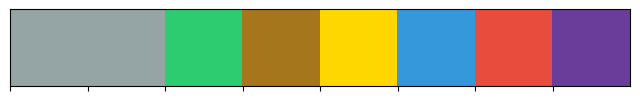

- Loading data...
    - Real (1002, 10002) loaded from /scratch2/prateek/genetic_pc/reproduce_final/1KG/8020/data/8020_test.hapt
    - Truth (4006, 10002) loaded from /scratch2/prateek/genetic_pc/reproduce_final/1KG/8020/data/8020_train.hapt
    - Indep (5008, 10002) loaded from /scratch2/prateek/genetic_pc/reproduce_final/1KG/8020/indep/10K_indep_8020_samples.hapt
    - Markov (5008, 10002) loaded from /scratch2/prateek/genetic_pc/reproduce_final/1KG/8020/markov/10K_markov_8020_samples.hapt
    - HMM (5008, 10002) loaded from /scratch2/prateek/genetic_pc/reproduce_final/1KG/8020/hmm/10K_hmm_8020_samples3.hapt
    - WGAN (5008, 10002) loaded from /scratch2/prateek/genetic_pc/reproduce_final/1KG/8020/wgan/10K_wgan_8020_samples.hapt
    - RBM (5008, 10002) loaded from /scratch2/prateek/genetic_pc/reproduce_final/1KG/8020/rbm/10K_rbm_8020_samples.hapt
    - HCLT (5008, 10002) loaded from /scratch2/prateek/genetic_pc/reproduce_final/1KG/8020/hclt/10K_hclt_8020_samples.hapt
- Dictionnary of

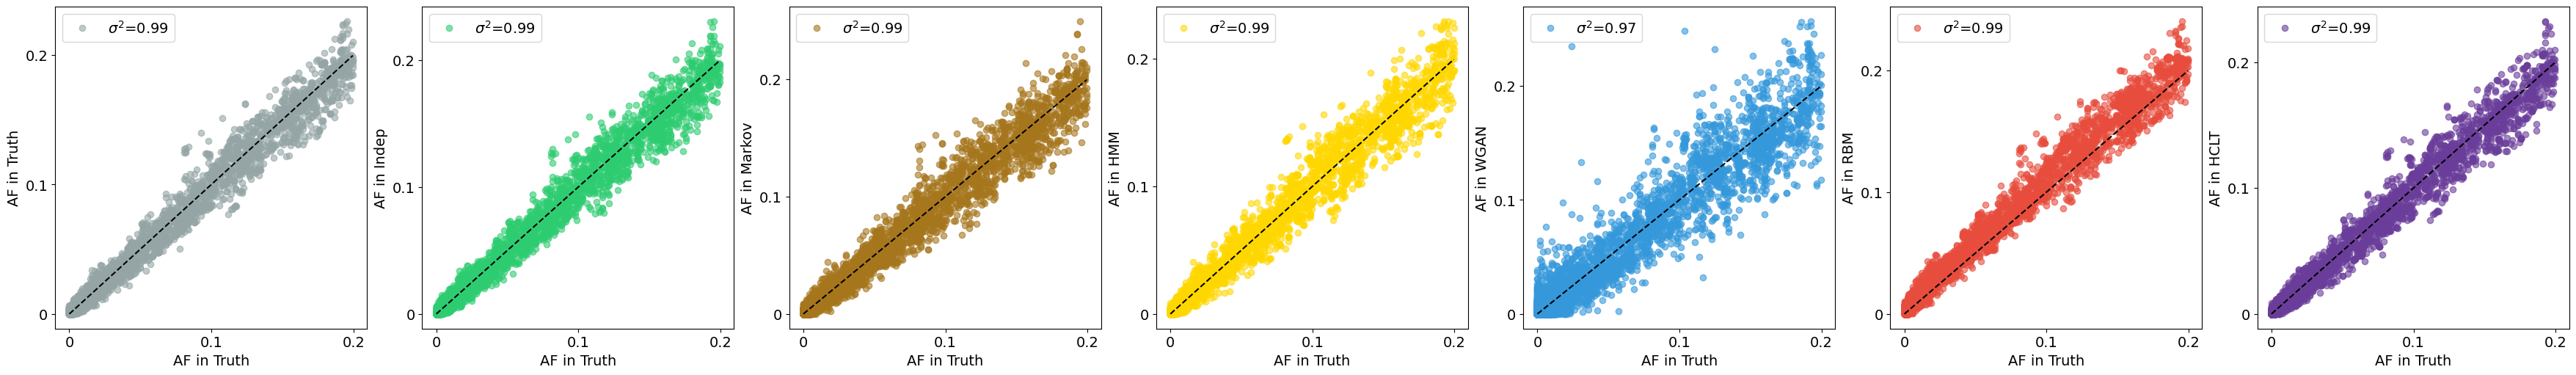

['Truth', 'Truth']
0.9980809621878828
[0, 0.25, 0.5]
['Truth', 'Indep']
0.9977399469361637
[0, 0.25, 0.5]
['Truth', 'Markov']
0.9967304693402418
[0, 0.25, 0.5]
['Truth', 'HMM']
0.9970346447386016
[0, 0.25, 0.5]
['Truth', 'WGAN']
0.9921137619323359
[0, 0.25, 0.5]
['Truth', 'RBM']
0.9974639784160728
[0, 0.25, 0.5]
['Truth', 'HCLT']
0.9979161810986164
[0, 0.25, 0.5]
    - Zoomed allele frequencies plot saved to ./FIGS/1KG/to_minor_encoding-False;min_af-0;max_af-1;allchecks-0;n-5008/AC_generated_vs_Real.pdf


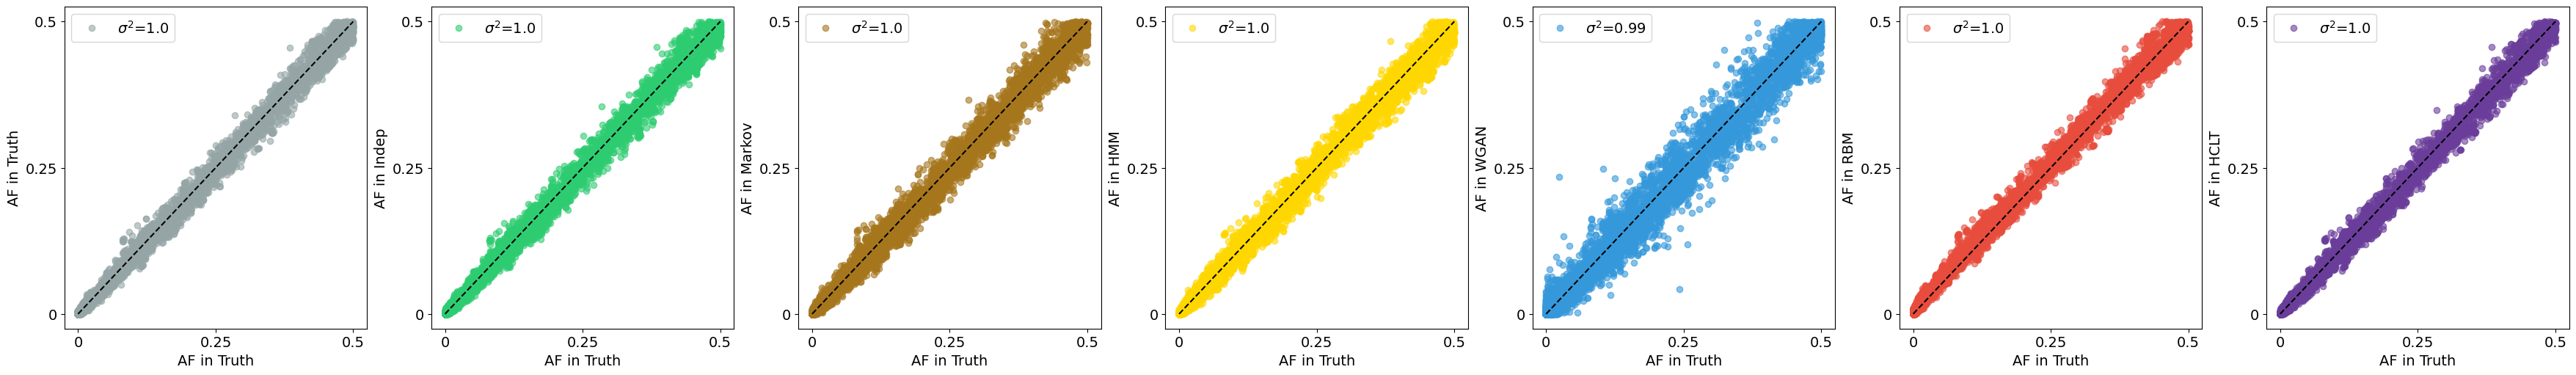

#################### AF DONE ####################

#################### PCA ####################
- Computing and plotting PCA...
    - Computing and plotting Combined PCA ...
    - PCA superpose file saved in ./FIGS/1KG/to_minor_encoding-False;min_af-0;max_af-1;allchecks-0;n-5008/PCA_allel_compare_models_Combined PCA.pdf
    - PCA density file saved in ./FIGS/1KG/to_minor_encoding-False;min_af-0;max_af-1;allchecks-0;n-5008/PCA_densities_compare_Combined PCA.pdf


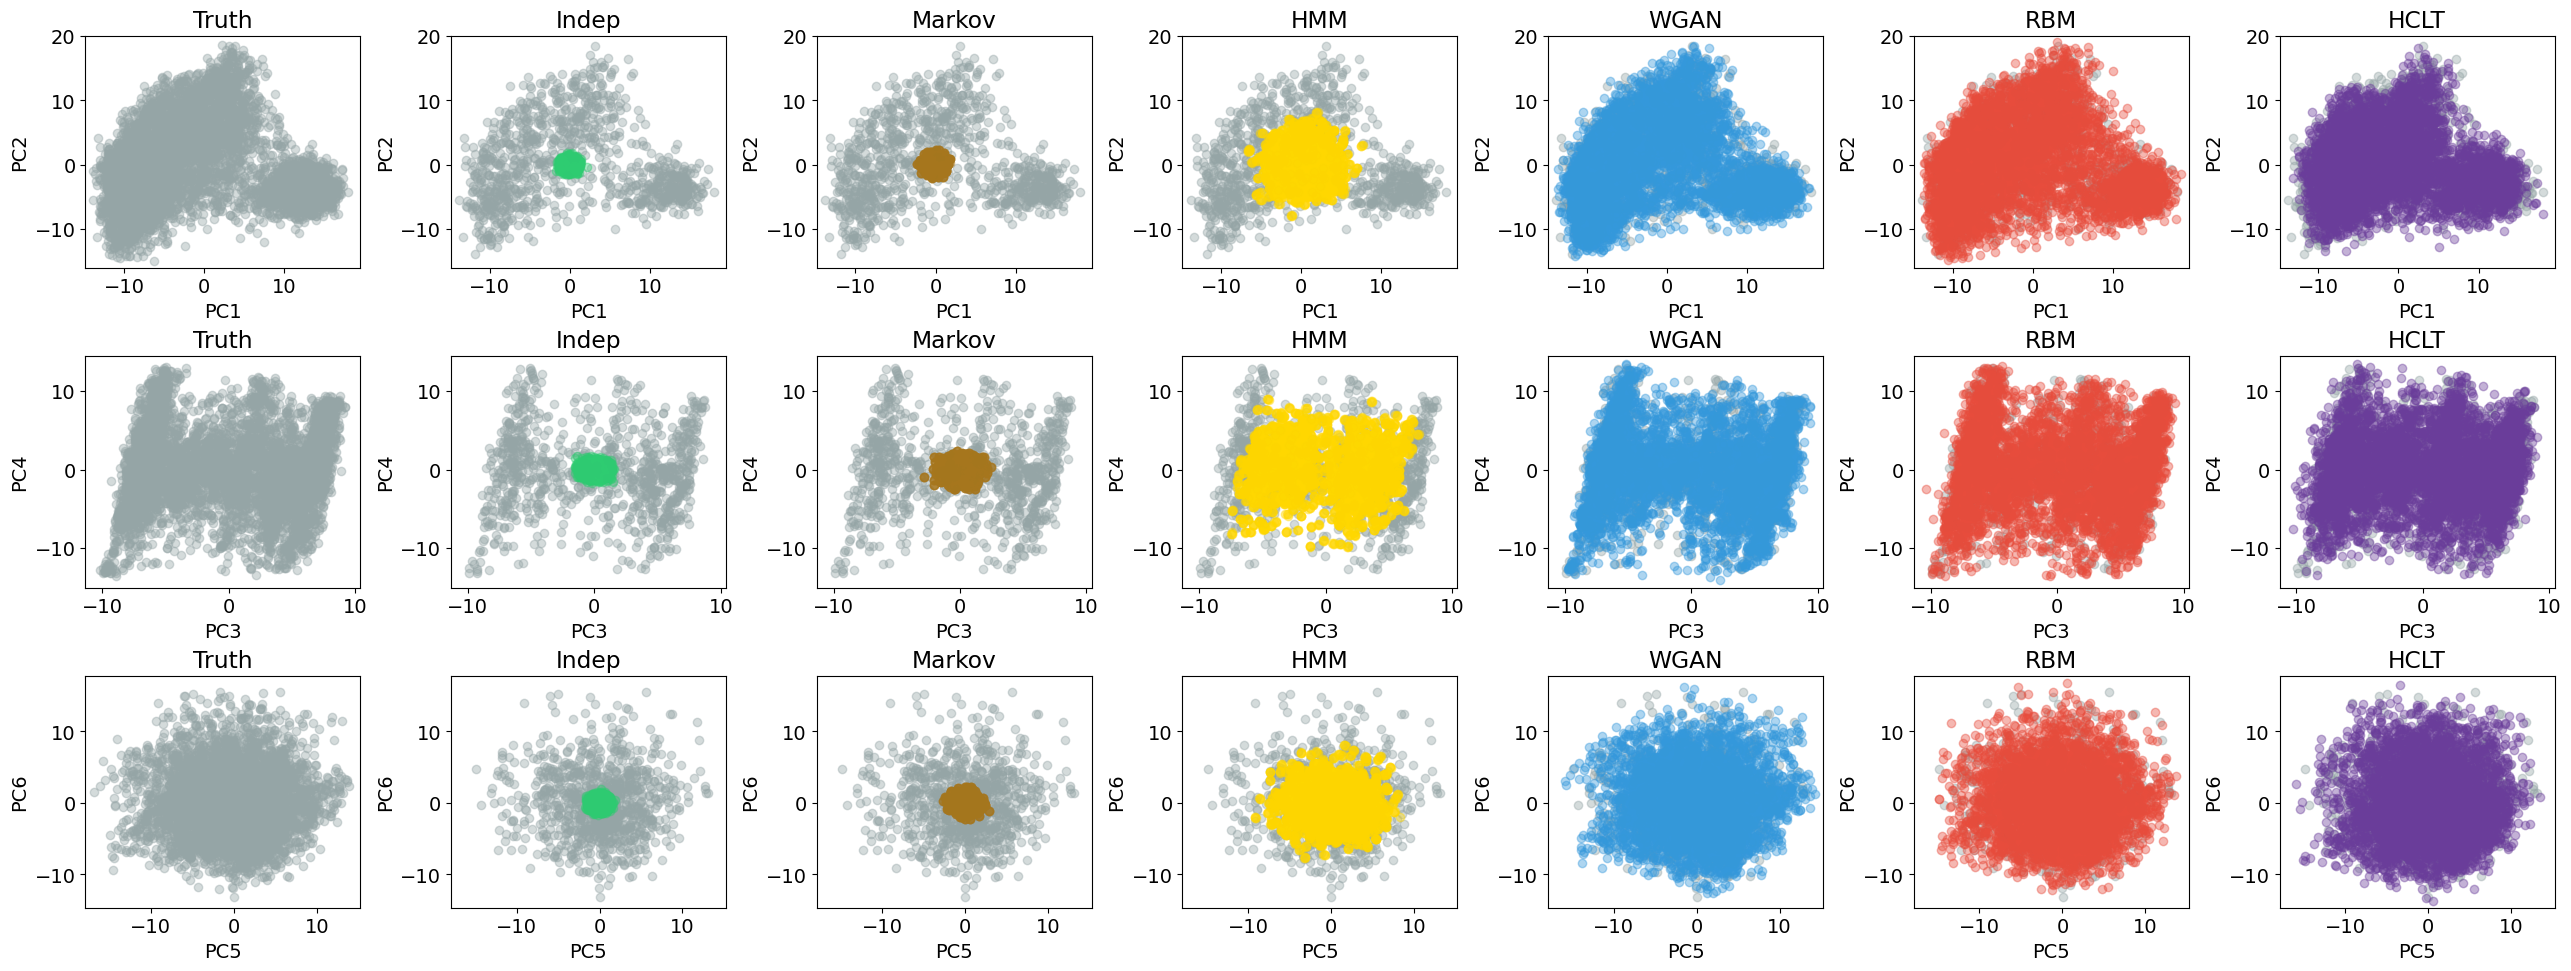

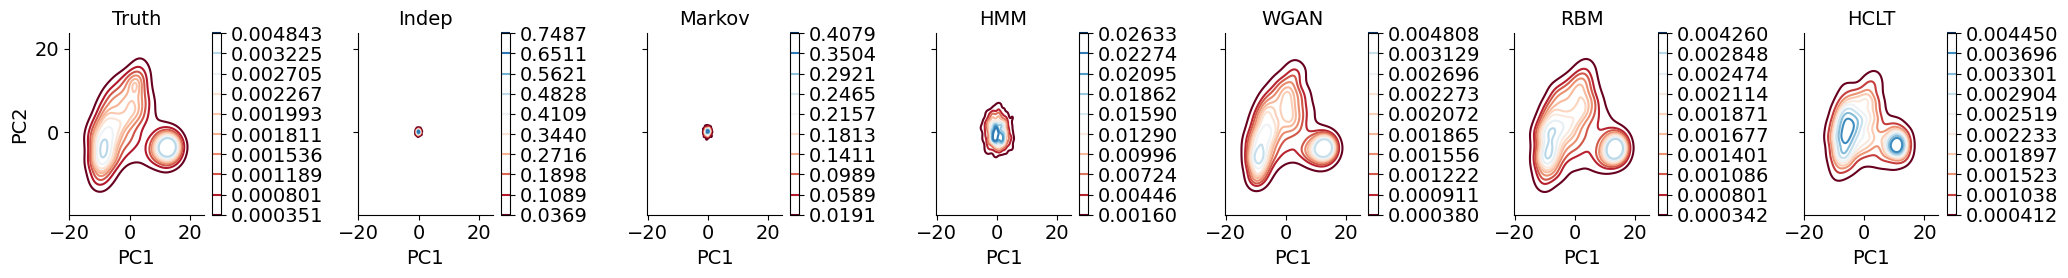

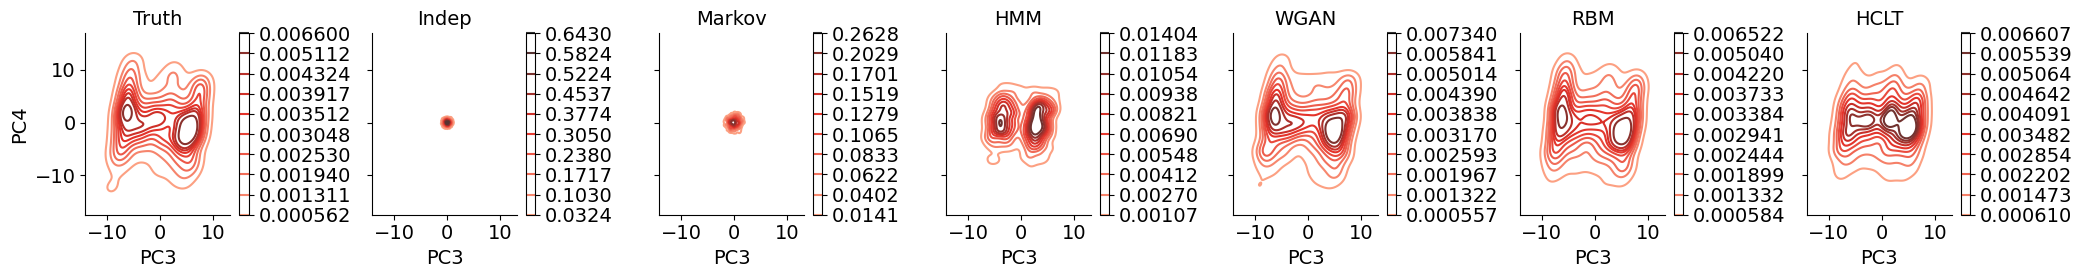

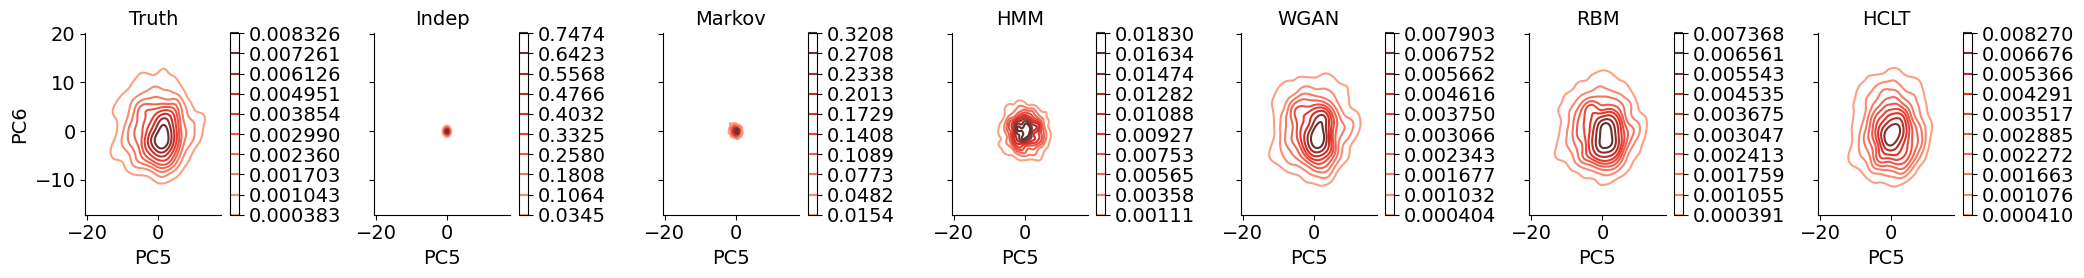

Computing Coupled PCA ...
    - PCA superpose file saved in ./FIGS/1KG/to_minor_encoding-False;min_af-0;max_af-1;allchecks-0;n-5008/PCA_allel_compare_models_Coupled PCA.pdf
    - PCA density file saved in ./FIGS/1KG/to_minor_encoding-False;min_af-0;max_af-1;allchecks-0;n-5008/PCA_densities_compare_Coupled PCA.pdf


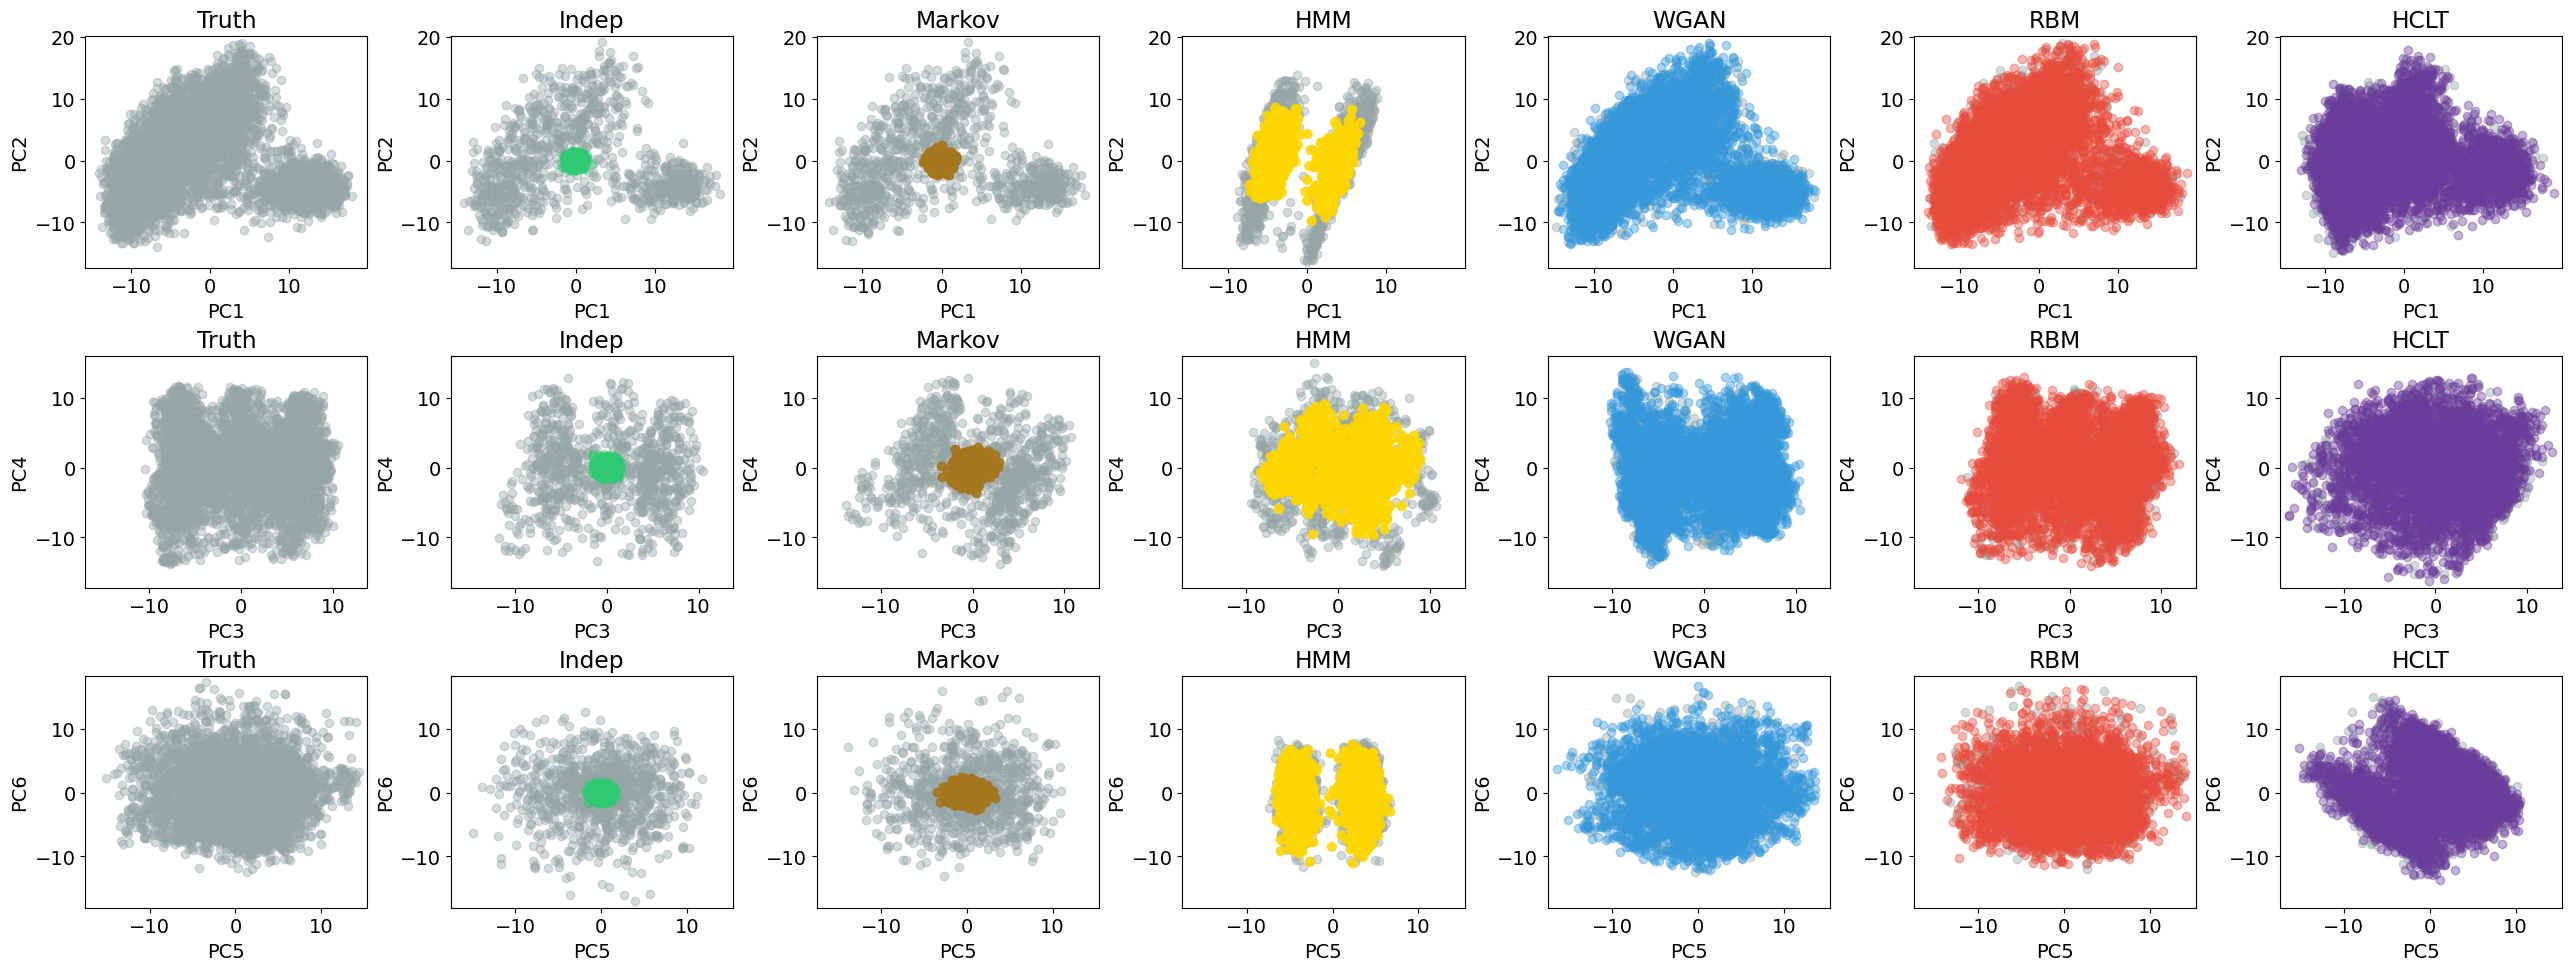

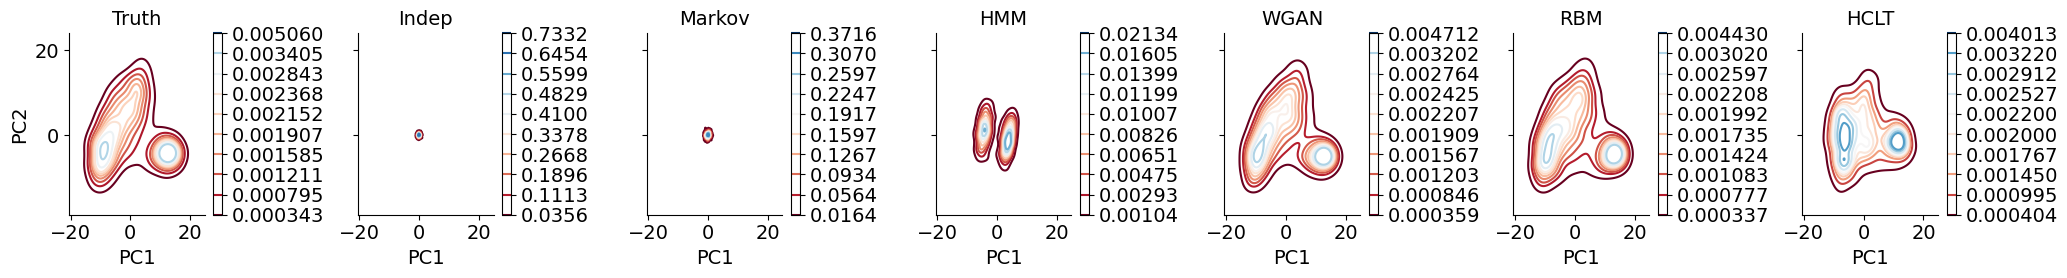

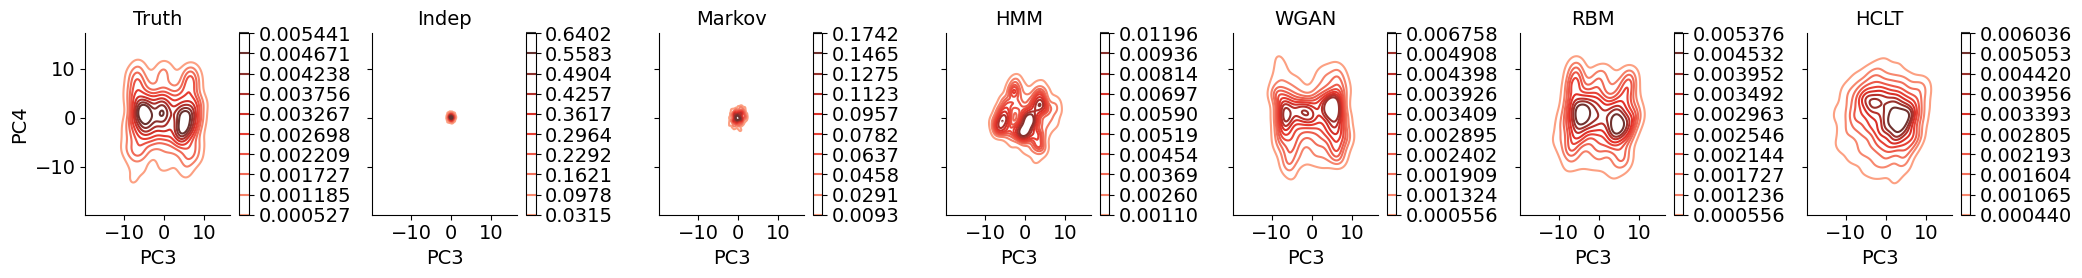

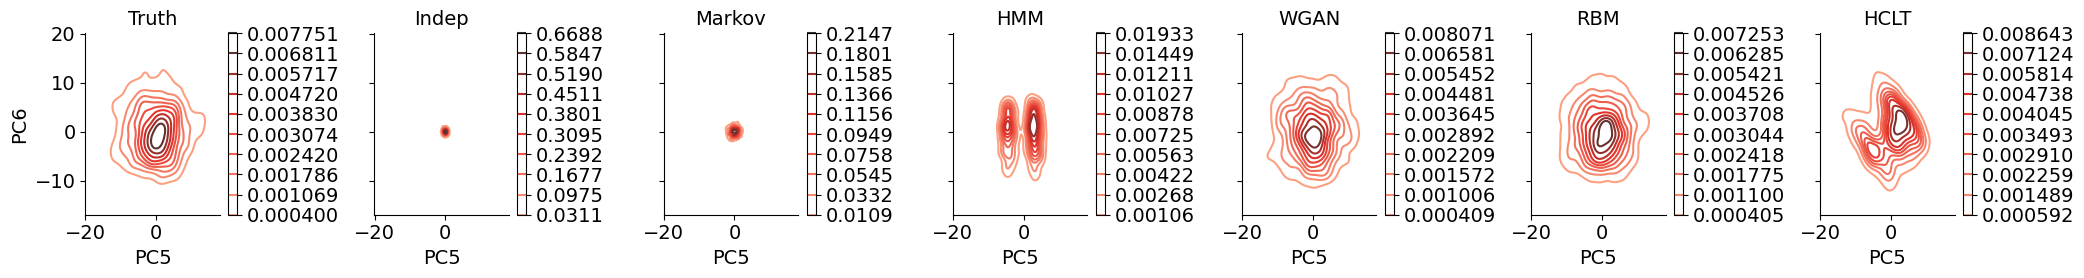

wasserstein
2004
2004
4006
1002
5008
1002
5008
1002
5008
1002
5008
1002
5008
1002
5008
1002
Scorelist-wasserstein            stat  statistic pvalue   label PC       method
0   wasserstein   0.000000   None    Real  1  coupled_PCA
1   wasserstein   0.000000   None    Real  2  coupled_PCA
2   wasserstein   0.000000   None    Real  3  coupled_PCA
3   wasserstein   0.000000   None    Real  4  coupled_PCA
4   wasserstein   0.000000   None    Real  5  coupled_PCA
5   wasserstein   0.000000   None    Real  6  coupled_PCA
6   wasserstein   0.455437   None   Truth  1  coupled_PCA
7   wasserstein   0.186920   None   Truth  2  coupled_PCA
8   wasserstein   0.179773   None   Truth  3  coupled_PCA
9   wasserstein   0.273080   None   Truth  4  coupled_PCA
10  wasserstein   0.195322   None   Truth  5  coupled_PCA
11  wasserstein   0.168433   None   Truth  6  coupled_PCA
12  wasserstein   7.042629   None   Indep  1  coupled_PCA
13  wasserstein   5.106236   None   Indep  2  coupled_PCA
14  wasserstein 

/scratch2/prateek/genetic-pc/src/short/plot_utils.py:390: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Scores = Scores.append({'stat':stat, 'statistic':sc, 'pvalue':None, 'label':key, 'PC':pc+1, 'method':method}, ignore_index=True)
/scratch2/prateek/genetic-pc/src/short/plot_utils.py:390: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Scores = Scores.append({'stat':stat, 'statistic':sc, 'pvalue':None, 'label':key, 'PC':pc+1, 'method':method}, ignore_index=True)
/scratch2/prateek/genetic-pc/src/short/plot_utils.py:390: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Scores = Scores.append({'stat':stat, 'statistic':sc, 'pvalue':None, 'label':key, 'PC':pc+1, 'method':method}, ignore_index=True)
/scratch2/prateek/genetic-pc/src/s

>>> computePCAdist begin <<<, 
 Size of a b M 2004 2004 4016016
>>> computePCAdist begin <<<, stat=wasserstein2D
 Real 0.0018029091296017873 
>>> computePCAdist end <<<

>>> computePCAdist begin <<<, 
 Size of a b M 2004 2004 4016016


/scratch2/prateek/genetic-pc/src/short/plot_utils.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Scores = Scores.append({'stat':stat, 'statistic':sc, 'reg':reg, 'label':key, 'PC':f'{pc+1}-{pc+2}', 'method':method}, ignore_index=True)


>>> computePCAdist begin <<<, stat=wasserstein2D
 Real 0.001783832261836495 
>>> computePCAdist end <<<

>>> computePCAdist begin <<<, 
 Size of a b M 2004 2004 4016016


/scratch2/prateek/genetic-pc/src/short/plot_utils.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Scores = Scores.append({'stat':stat, 'statistic':sc, 'reg':reg, 'label':key, 'PC':f'{pc+1}-{pc+2}', 'method':method}, ignore_index=True)


>>> computePCAdist begin <<<, stat=wasserstein2D
 Real 0.001828232869632029 
>>> computePCAdist end <<<

4006
1002
>>> computePCAdist begin <<<, 
 Size of a b M 1002 4006 4014012


/scratch2/prateek/genetic-pc/src/short/plot_utils.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Scores = Scores.append({'stat':stat, 'statistic':sc, 'reg':reg, 'label':key, 'PC':f'{pc+1}-{pc+2}', 'method':method}, ignore_index=True)


>>> computePCAdist begin <<<, stat=wasserstein2D
 Truth 0.002615215589418798 
>>> computePCAdist end <<<

>>> computePCAdist begin <<<, 
 Size of a b M 1002 4006 4014012


/scratch2/prateek/genetic-pc/src/short/plot_utils.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Scores = Scores.append({'stat':stat, 'statistic':sc, 'reg':reg, 'label':key, 'PC':f'{pc+1}-{pc+2}', 'method':method}, ignore_index=True)


>>> computePCAdist begin <<<, stat=wasserstein2D
 Truth 0.0022130155578065033 
>>> computePCAdist end <<<

>>> computePCAdist begin <<<, 
 Size of a b M 1002 4006 4014012


/scratch2/prateek/genetic-pc/src/short/plot_utils.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Scores = Scores.append({'stat':stat, 'statistic':sc, 'reg':reg, 'label':key, 'PC':f'{pc+1}-{pc+2}', 'method':method}, ignore_index=True)


>>> computePCAdist begin <<<, stat=wasserstein2D
 Truth 0.0022679344104641983 
>>> computePCAdist end <<<

5008
1002
>>> computePCAdist begin <<<, 
 Size of a b M 1002 5008 5018016


/scratch2/prateek/genetic-pc/src/short/plot_utils.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Scores = Scores.append({'stat':stat, 'statistic':sc, 'reg':reg, 'label':key, 'PC':f'{pc+1}-{pc+2}', 'method':method}, ignore_index=True)


>>> computePCAdist begin <<<, stat=wasserstein2D
 Indep 0.23550709524126384 
>>> computePCAdist end <<<

>>> computePCAdist begin <<<, 
 Size of a b M 1002 5008 5018016


/scratch2/prateek/genetic-pc/src/short/plot_utils.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Scores = Scores.append({'stat':stat, 'statistic':sc, 'reg':reg, 'label':key, 'PC':f'{pc+1}-{pc+2}', 'method':method}, ignore_index=True)


>>> computePCAdist begin <<<, stat=wasserstein2D
 Indep 0.1475862901194259 
>>> computePCAdist end <<<

>>> computePCAdist begin <<<, 
 Size of a b M 1002 5008 5018016


/scratch2/prateek/genetic-pc/src/short/plot_utils.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Scores = Scores.append({'stat':stat, 'statistic':sc, 'reg':reg, 'label':key, 'PC':f'{pc+1}-{pc+2}', 'method':method}, ignore_index=True)


>>> computePCAdist begin <<<, stat=wasserstein2D
 Indep 0.10105554601099714 
>>> computePCAdist end <<<

5008
1002
>>> computePCAdist begin <<<, 
 Size of a b M 1002 5008 5018016


/scratch2/prateek/genetic-pc/src/short/plot_utils.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Scores = Scores.append({'stat':stat, 'statistic':sc, 'reg':reg, 'label':key, 'PC':f'{pc+1}-{pc+2}', 'method':method}, ignore_index=True)


>>> computePCAdist begin <<<, stat=wasserstein2D
 Markov 0.20854306793044702 
>>> computePCAdist end <<<

>>> computePCAdist begin <<<, 
 Size of a b M 1002 5008 5018016


/scratch2/prateek/genetic-pc/src/short/plot_utils.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Scores = Scores.append({'stat':stat, 'statistic':sc, 'reg':reg, 'label':key, 'PC':f'{pc+1}-{pc+2}', 'method':method}, ignore_index=True)


>>> computePCAdist begin <<<, stat=wasserstein2D
 Markov 0.1148300486197159 
>>> computePCAdist end <<<

>>> computePCAdist begin <<<, 
 Size of a b M 1002 5008 5018016


/scratch2/prateek/genetic-pc/src/short/plot_utils.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Scores = Scores.append({'stat':stat, 'statistic':sc, 'reg':reg, 'label':key, 'PC':f'{pc+1}-{pc+2}', 'method':method}, ignore_index=True)


>>> computePCAdist begin <<<, stat=wasserstein2D
 Markov 0.08215280975601388 
>>> computePCAdist end <<<

5008
1002
>>> computePCAdist begin <<<, 
 Size of a b M 1002 5008 5018016


/scratch2/prateek/genetic-pc/src/short/plot_utils.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Scores = Scores.append({'stat':stat, 'statistic':sc, 'reg':reg, 'label':key, 'PC':f'{pc+1}-{pc+2}', 'method':method}, ignore_index=True)


>>> computePCAdist begin <<<, stat=wasserstein2D
 HMM 0.034785917280470965 
>>> computePCAdist end <<<

>>> computePCAdist begin <<<, 
 Size of a b M 1002 5008 5018016


/scratch2/prateek/genetic-pc/src/short/plot_utils.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Scores = Scores.append({'stat':stat, 'statistic':sc, 'reg':reg, 'label':key, 'PC':f'{pc+1}-{pc+2}', 'method':method}, ignore_index=True)


>>> computePCAdist begin <<<, stat=wasserstein2D
 HMM 0.012250631565107773 
>>> computePCAdist end <<<

>>> computePCAdist begin <<<, 
 Size of a b M 1002 5008 5018016


/scratch2/prateek/genetic-pc/src/short/plot_utils.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Scores = Scores.append({'stat':stat, 'statistic':sc, 'reg':reg, 'label':key, 'PC':f'{pc+1}-{pc+2}', 'method':method}, ignore_index=True)


>>> computePCAdist begin <<<, stat=wasserstein2D
 HMM 0.004238910966618575 
>>> computePCAdist end <<<

5008
1002
>>> computePCAdist begin <<<, 
 Size of a b M 1002 5008 5018016


/scratch2/prateek/genetic-pc/src/short/plot_utils.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Scores = Scores.append({'stat':stat, 'statistic':sc, 'reg':reg, 'label':key, 'PC':f'{pc+1}-{pc+2}', 'method':method}, ignore_index=True)


>>> computePCAdist begin <<<, stat=wasserstein2D
 WGAN 0.00283328020520319 
>>> computePCAdist end <<<

>>> computePCAdist begin <<<, 
 Size of a b M 1002 5008 5018016


/scratch2/prateek/genetic-pc/src/short/plot_utils.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Scores = Scores.append({'stat':stat, 'statistic':sc, 'reg':reg, 'label':key, 'PC':f'{pc+1}-{pc+2}', 'method':method}, ignore_index=True)


>>> computePCAdist begin <<<, stat=wasserstein2D
 WGAN 0.002294011243517509 
>>> computePCAdist end <<<

>>> computePCAdist begin <<<, 
 Size of a b M 1002 5008 5018016


/scratch2/prateek/genetic-pc/src/short/plot_utils.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Scores = Scores.append({'stat':stat, 'statistic':sc, 'reg':reg, 'label':key, 'PC':f'{pc+1}-{pc+2}', 'method':method}, ignore_index=True)


>>> computePCAdist begin <<<, stat=wasserstein2D
 WGAN 0.0023552164572290066 
>>> computePCAdist end <<<

5008
1002
>>> computePCAdist begin <<<, 
 Size of a b M 1002 5008 5018016


/scratch2/prateek/genetic-pc/src/short/plot_utils.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Scores = Scores.append({'stat':stat, 'statistic':sc, 'reg':reg, 'label':key, 'PC':f'{pc+1}-{pc+2}', 'method':method}, ignore_index=True)


>>> computePCAdist begin <<<, stat=wasserstein2D
 RBM 0.002726646829679593 
>>> computePCAdist end <<<

>>> computePCAdist begin <<<, 
 Size of a b M 1002 5008 5018016


/scratch2/prateek/genetic-pc/src/short/plot_utils.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Scores = Scores.append({'stat':stat, 'statistic':sc, 'reg':reg, 'label':key, 'PC':f'{pc+1}-{pc+2}', 'method':method}, ignore_index=True)


>>> computePCAdist begin <<<, stat=wasserstein2D
 RBM 0.0023595796454872553 
>>> computePCAdist end <<<

>>> computePCAdist begin <<<, 
 Size of a b M 1002 5008 5018016


/scratch2/prateek/genetic-pc/src/short/plot_utils.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Scores = Scores.append({'stat':stat, 'statistic':sc, 'reg':reg, 'label':key, 'PC':f'{pc+1}-{pc+2}', 'method':method}, ignore_index=True)


>>> computePCAdist begin <<<, stat=wasserstein2D
 RBM 0.0022841027301948196 
>>> computePCAdist end <<<

5008
1002
>>> computePCAdist begin <<<, 
 Size of a b M 1002 5008 5018016


/scratch2/prateek/genetic-pc/src/short/plot_utils.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Scores = Scores.append({'stat':stat, 'statistic':sc, 'reg':reg, 'label':key, 'PC':f'{pc+1}-{pc+2}', 'method':method}, ignore_index=True)


>>> computePCAdist begin <<<, stat=wasserstein2D
 HCLT 0.003946109712459956 
>>> computePCAdist end <<<

>>> computePCAdist begin <<<, 
 Size of a b M 1002 5008 5018016


/scratch2/prateek/genetic-pc/src/short/plot_utils.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Scores = Scores.append({'stat':stat, 'statistic':sc, 'reg':reg, 'label':key, 'PC':f'{pc+1}-{pc+2}', 'method':method}, ignore_index=True)


>>> computePCAdist begin <<<, stat=wasserstein2D
 HCLT 0.002848899499905643 
>>> computePCAdist end <<<

>>> computePCAdist begin <<<, 
 Size of a b M 1002 5008 5018016


/scratch2/prateek/genetic-pc/src/short/plot_utils.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Scores = Scores.append({'stat':stat, 'statistic':sc, 'reg':reg, 'label':key, 'PC':f'{pc+1}-{pc+2}', 'method':method}, ignore_index=True)


>>> computePCAdist begin <<<, stat=wasserstein2D
 HCLT 0.002920882347272315 
>>> computePCAdist end <<<

Scorelist-wasserstein2D              stat  statistic pvalue   label   PC       method    reg
0   wasserstein2D   0.001803    NaN    Real  1-2  coupled_PCA  0.002
1   wasserstein2D   0.001784    NaN    Real  3-4  coupled_PCA  0.002
2   wasserstein2D   0.001828    NaN    Real  5-6  coupled_PCA  0.002
3   wasserstein2D   0.002615    NaN   Truth  1-2  coupled_PCA  0.002
4   wasserstein2D   0.002213    NaN   Truth  3-4  coupled_PCA  0.002
5   wasserstein2D   0.002268    NaN   Truth  5-6  coupled_PCA  0.002
6   wasserstein2D   0.235507    NaN   Indep  1-2  coupled_PCA  0.002
7   wasserstein2D   0.147586    NaN   Indep  3-4  coupled_PCA  0.002
8   wasserstein2D   0.101056    NaN   Indep  5-6  coupled_PCA  0.002
9   wasserstein2D   0.208543    NaN  Markov  1-2  coupled_PCA  0.002
10  wasserstein2D   0.114830    NaN  Markov  3-4  coupled_PCA  0.002
11  wasserstein2D   0.082153    NaN  Markov

/scratch2/prateek/genetic-pc/src/short/plot_utils.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Scores = Scores.append({'stat':stat, 'statistic':sc, 'reg':reg, 'label':key, 'PC':f'{pc+1}-{pc+2}', 'method':method}, ignore_index=True)


Truth
Indep
Markov
HMM
WGAN
RBM
HCLT
0
	Quantile [0.000e+00 1.000e-04 2.000e-04 ... 9.998e-01 9.999e-01 1.000e+00]
['Truth', 'Truth']
0.9997708956764493
['Truth', 'Truth']
0.9917299969729224
1
	Quantile [0.000e+00 1.000e-04 2.000e-04 ... 9.998e-01 9.999e-01 1.000e+00]
['Truth', 'Indep']
0.3973583166596599
['Truth', 'Indep']
-0.005493685078956226
2
	Quantile [0.000e+00 1.000e-04 2.000e-04 ... 9.998e-01 9.999e-01 1.000e+00]
['Truth', 'Markov']
0.47658006110193984
['Truth', 'Markov']
0.25346567572754
3
	Quantile [0.000e+00 1.000e-04 2.000e-04 ... 9.998e-01 9.999e-01 1.000e+00]
['Truth', 'HMM']
0.8657335547173272
['Truth', 'HMM']
0.7716866745028923
4
	Quantile [0.000e+00 1.000e-04 2.000e-04 ... 9.998e-01 9.999e-01 1.000e+00]
['Truth', 'WGAN']
0.9991495484695504
['Truth', 'WGAN']
0.9589380235188778
5
	Quantile [0.000e+00 1.000e-04 2.000e-04 ... 9.998e-01 9.999e-01 1.000e+00]
['Truth', 'RBM']
0.9995174459792658
['Truth', 'RBM']
0.9683595613932968
6
	Quantile [0.000e+00 1.000e-04 2.000e-04 ..

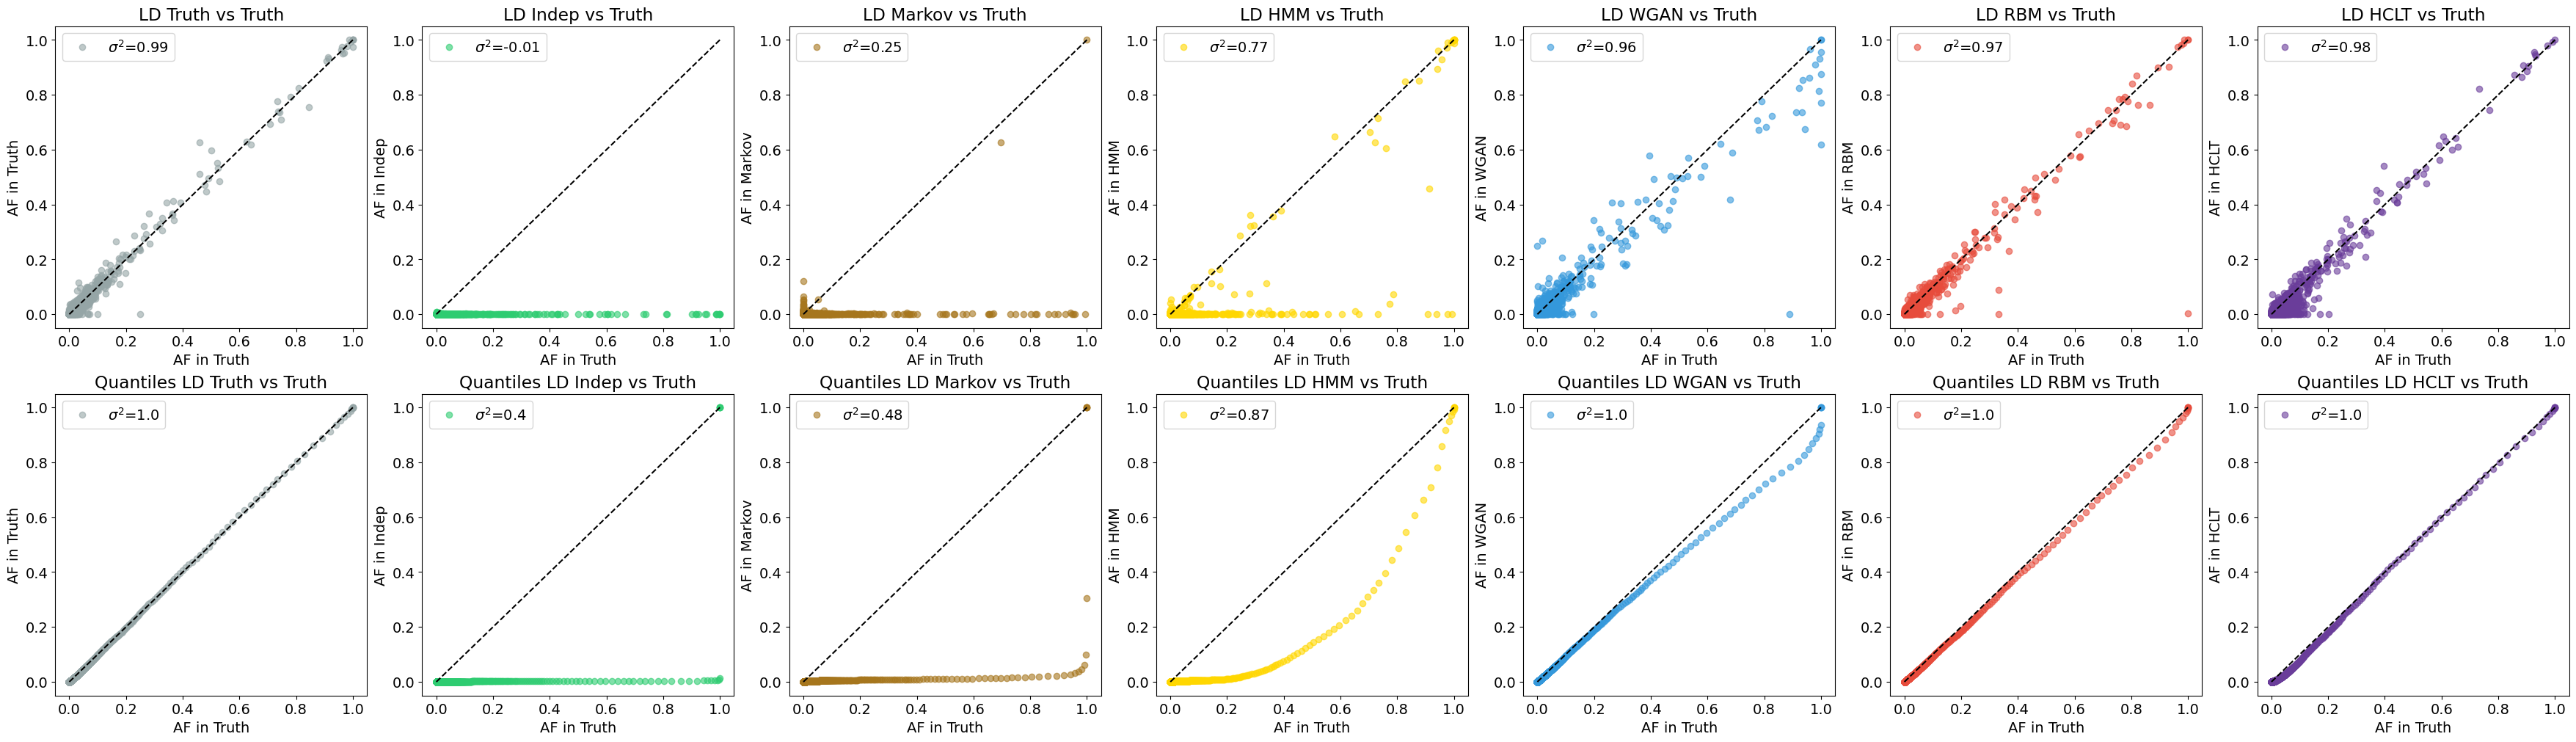

{'Truth': '#95a5a6', 'Indep': '#2ecc71', 'Markov': '#a6761d', 'HMM': 'gold', 'WGAN': '#3498db', 'RBM': '#e74c3c', 'HCLT': '#6a3d9a'}
dict_keys(['Truth', 'Indep', 'Markov', 'HMM', 'WGAN', 'RBM', 'HCLT'])


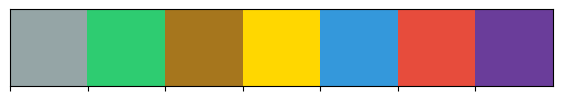

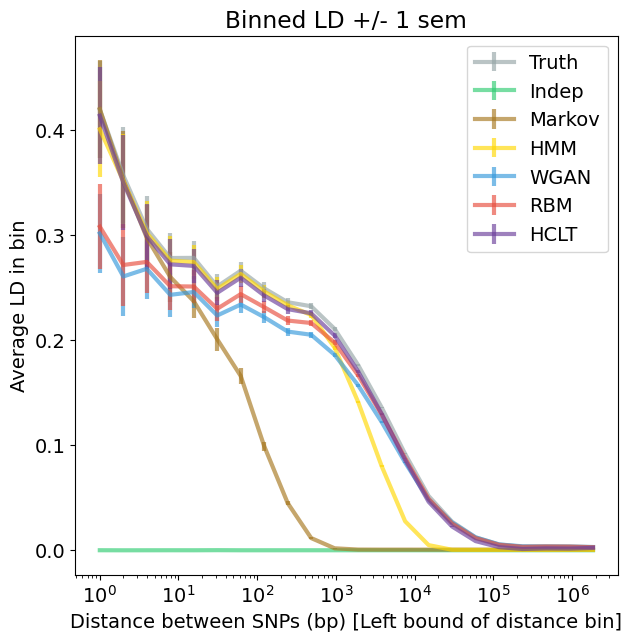

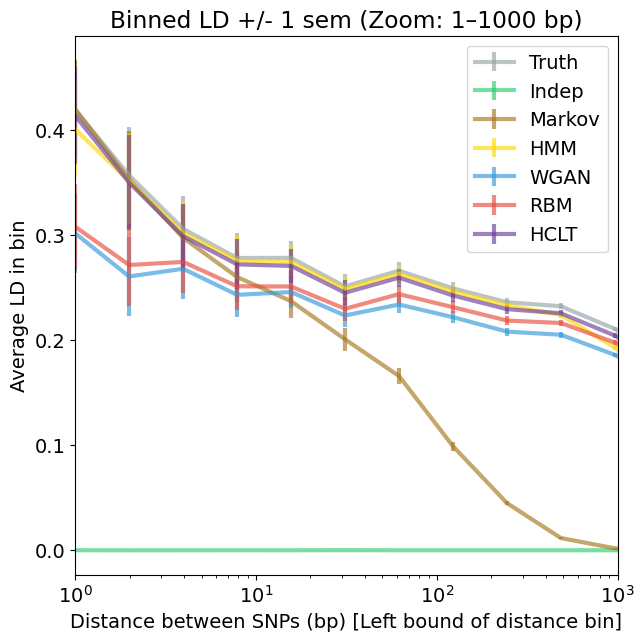

* Plotting LD block matrices...
dict_keys(['Truth', 'Indep', 'Markov', 'HMM', 'WGAN', 'RBM', 'HCLT', 'Real'])
dict_keys(['HCLT', 'Real'])
start


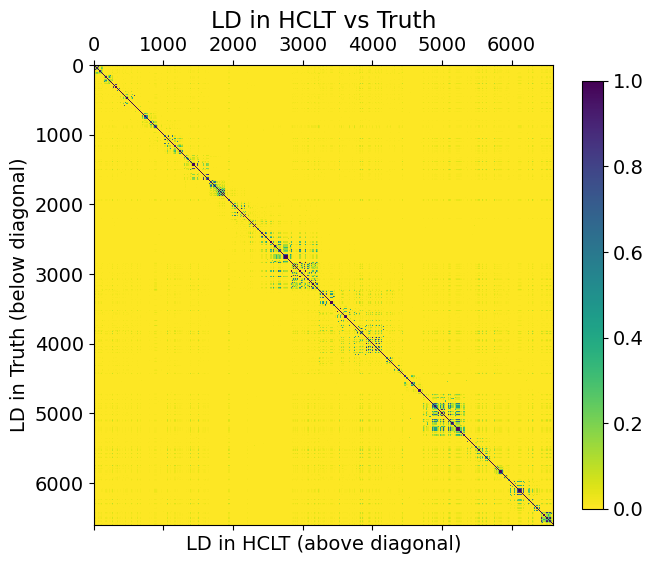

dict_keys(['HCLT', 'Real'])
start


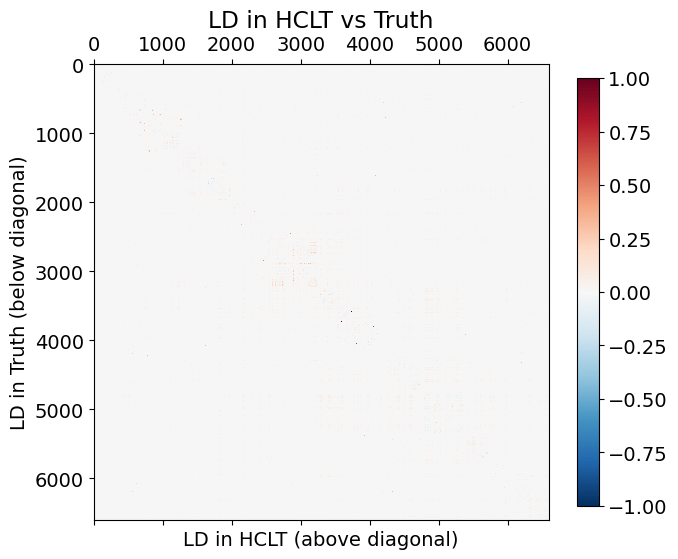

dict_keys(['HCLT', 'Real'])
start


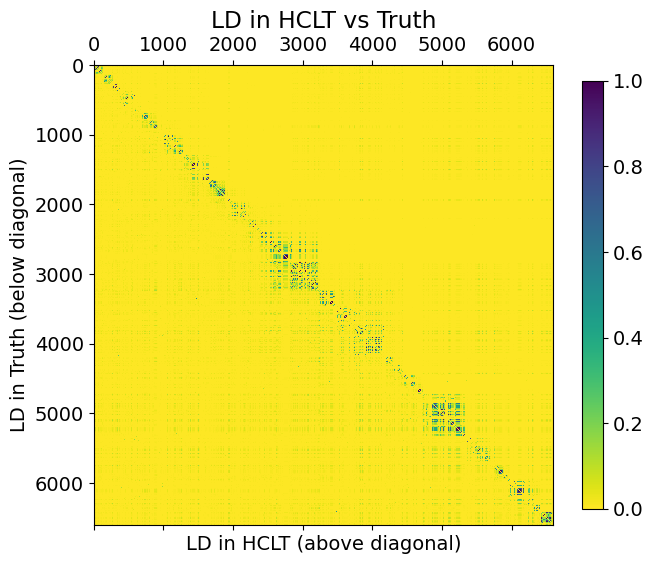

****************************************************************
*** Computation and plotting LD DONE. Figures saved in ./FIGS/1KG/to_minor_encoding-False;min_af-0;max_af-1;allchecks-0;n-5008/ ***
****************************************************************


In [14]:
%run -p {dirscript}/plotfig_utils_1_INIT.ipynb  # mandatory, all lines below are optional
%run -p {dirscript}/plotfig_utils_2_AF.ipynb 
%run -p {dirscript}/plotfig_utils_3_PCA.ipynb
%run -p {dirscript}/plotfig_utils_4_LD.ipynb


#################### DIST AATS ####################
- Computing pairwise distances and minimal distances and saving to compressed files...
boolComputeAATS: False
Loading precomputed AATS and MINDIST
AATS obtained


/tmp/ipykernel_477083/1500824750.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subset, hist=False, kde=True,
/tmp/ipykernel_477083/1500824750.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W = W.append({'stat': 'wasserstein', 'statistic': sc, 'pvalue': None,
/tmp/ipykernel_477083/1500824750.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel 

    - Saved ./FIGS/1KG/to_minor_encoding-False;min_af-0;max_af-1;allchecks-0;n-5008/haplo_pairw_distrib_within.pdf


/tmp/ipykernel_477083/1500824750.py:32: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subset, hist = False, kde = True,
/tmp/ipykernel_477083/1500824750.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W = W.append({'stat':'wasserstein','statistic':sc, 'pvalue':None,  'label':cat, 'comparaison':'between'}, ignore_index=True)
/tmp/ipykernel_477083/1500824750.py:32: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar fl

    - Saved ./FIGS/1KG/to_minor_encoding-False;min_af-0;max_af-1;allchecks-0;n-5008/haplo_pairw_distrib_between.pdf
           stat   statistic pvalue   label comparaison
0   wasserstein   10.657606   None   Truth      within
1   wasserstein  180.227594   None   Indep      within
2   wasserstein  172.701582   None  Markov      within
3   wasserstein  105.877442   None     HMM      within
4   wasserstein   14.730710   None    WGAN      within
5   wasserstein   61.989575   None     RBM      within
6   wasserstein   23.591279   None    HCLT      within
7   wasserstein    5.341521   None   Truth     between
8   wasserstein  128.237206   None   Indep     between
9   wasserstein  125.610657   None  Markov     between
10  wasserstein   86.252609   None     HMM     between
11  wasserstein    6.348263   None    WGAN     between
12  wasserstein   31.504518   None     RBM     between
13  wasserstein   18.729286   None    HCLT     between


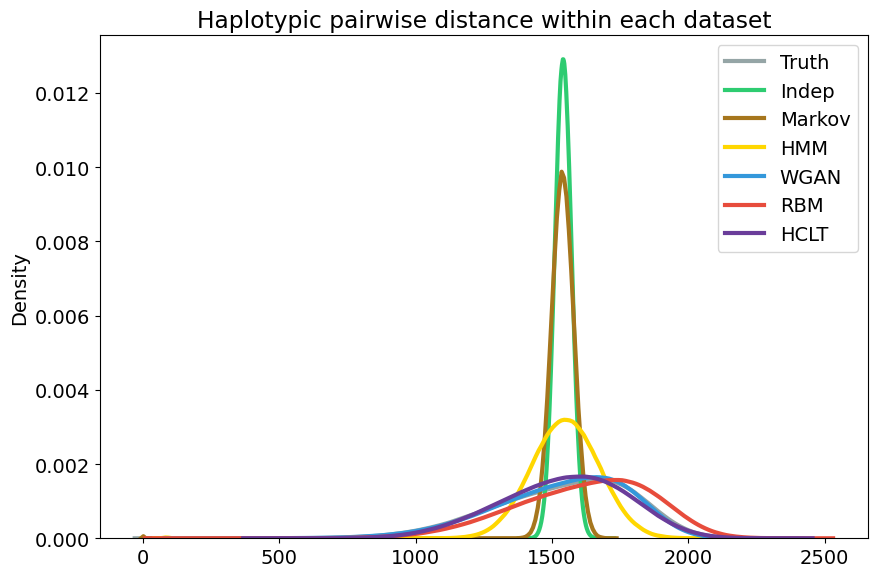

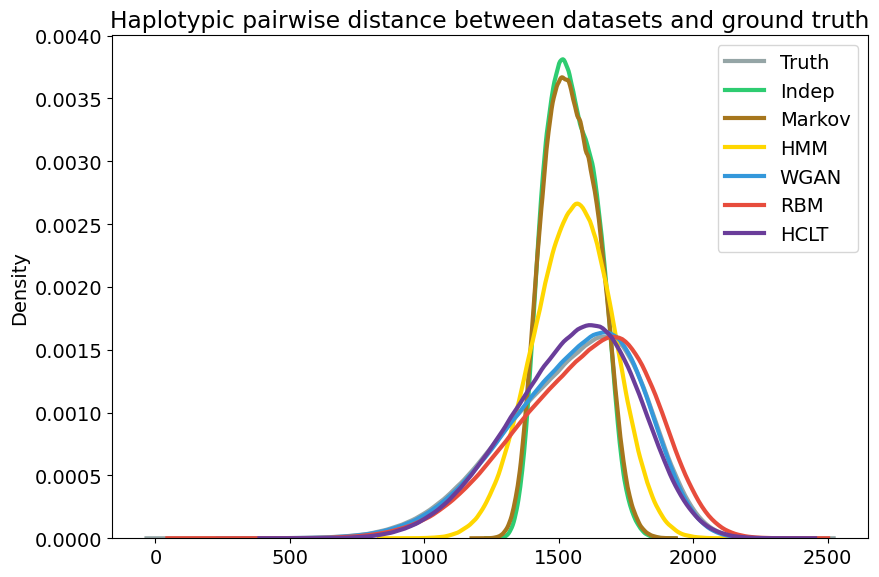

/scratch2/prateek/miniconda3/envs/pyjuice_env/lib/python3.9/site-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/scratch2/prateek/miniconda3/envs/pyjuice_env/lib/python3.9/site-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad

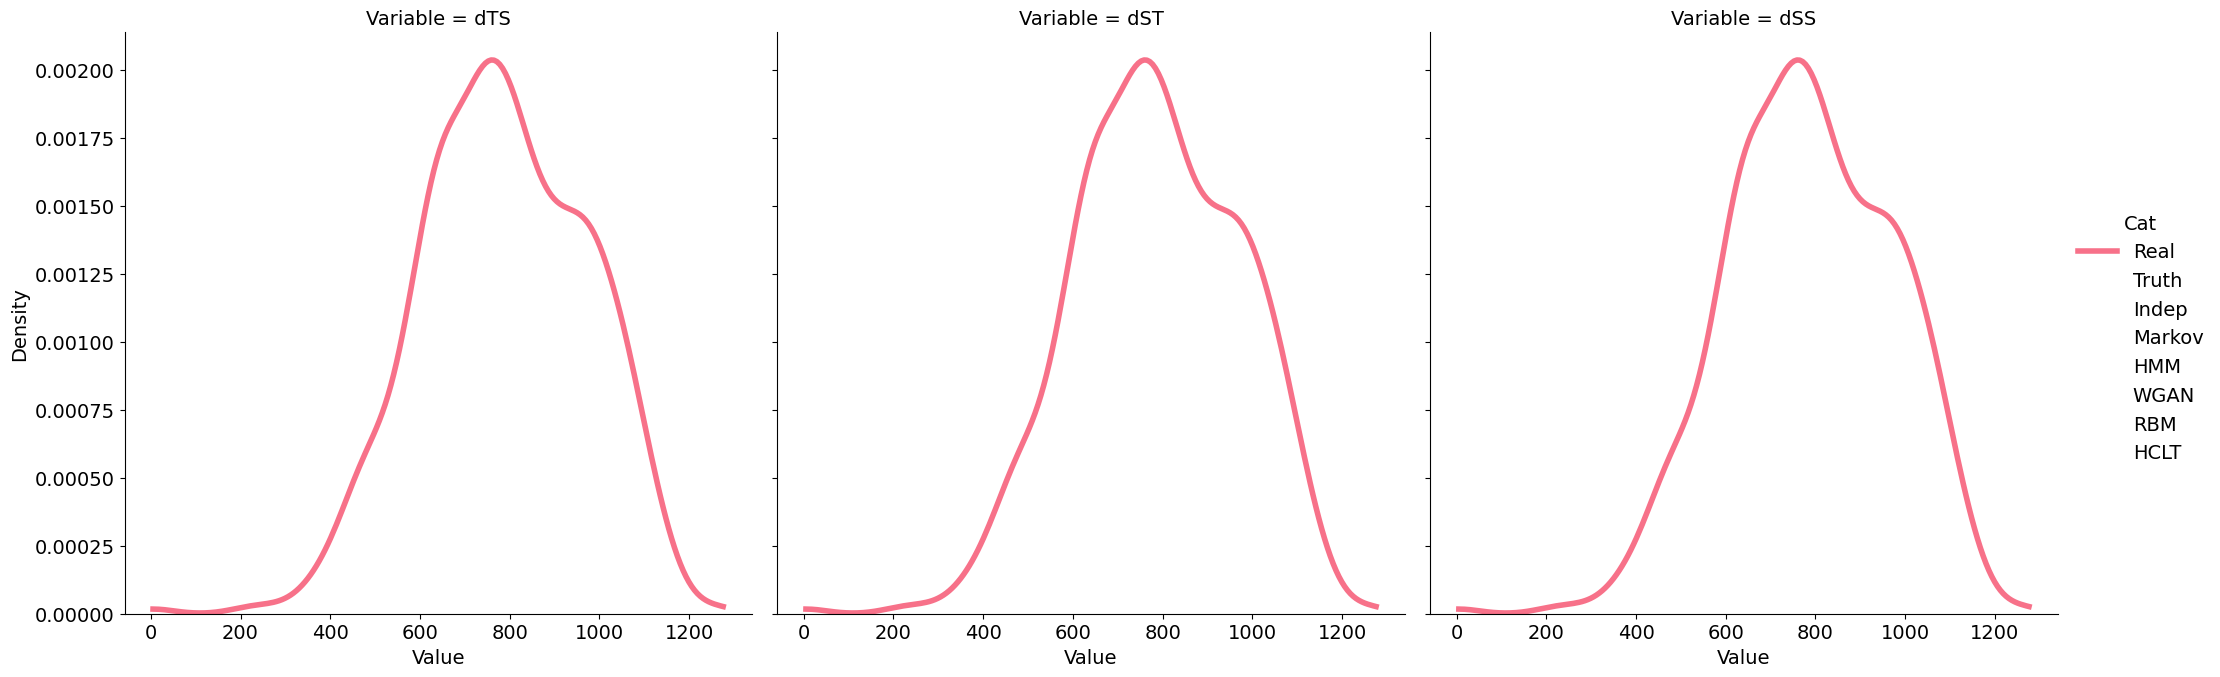

/scratch2/prateek/miniconda3/envs/pyjuice_env/lib/python3.9/site-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/scratch2/prateek/miniconda3/envs/pyjuice_env/lib/python3.9/site-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad

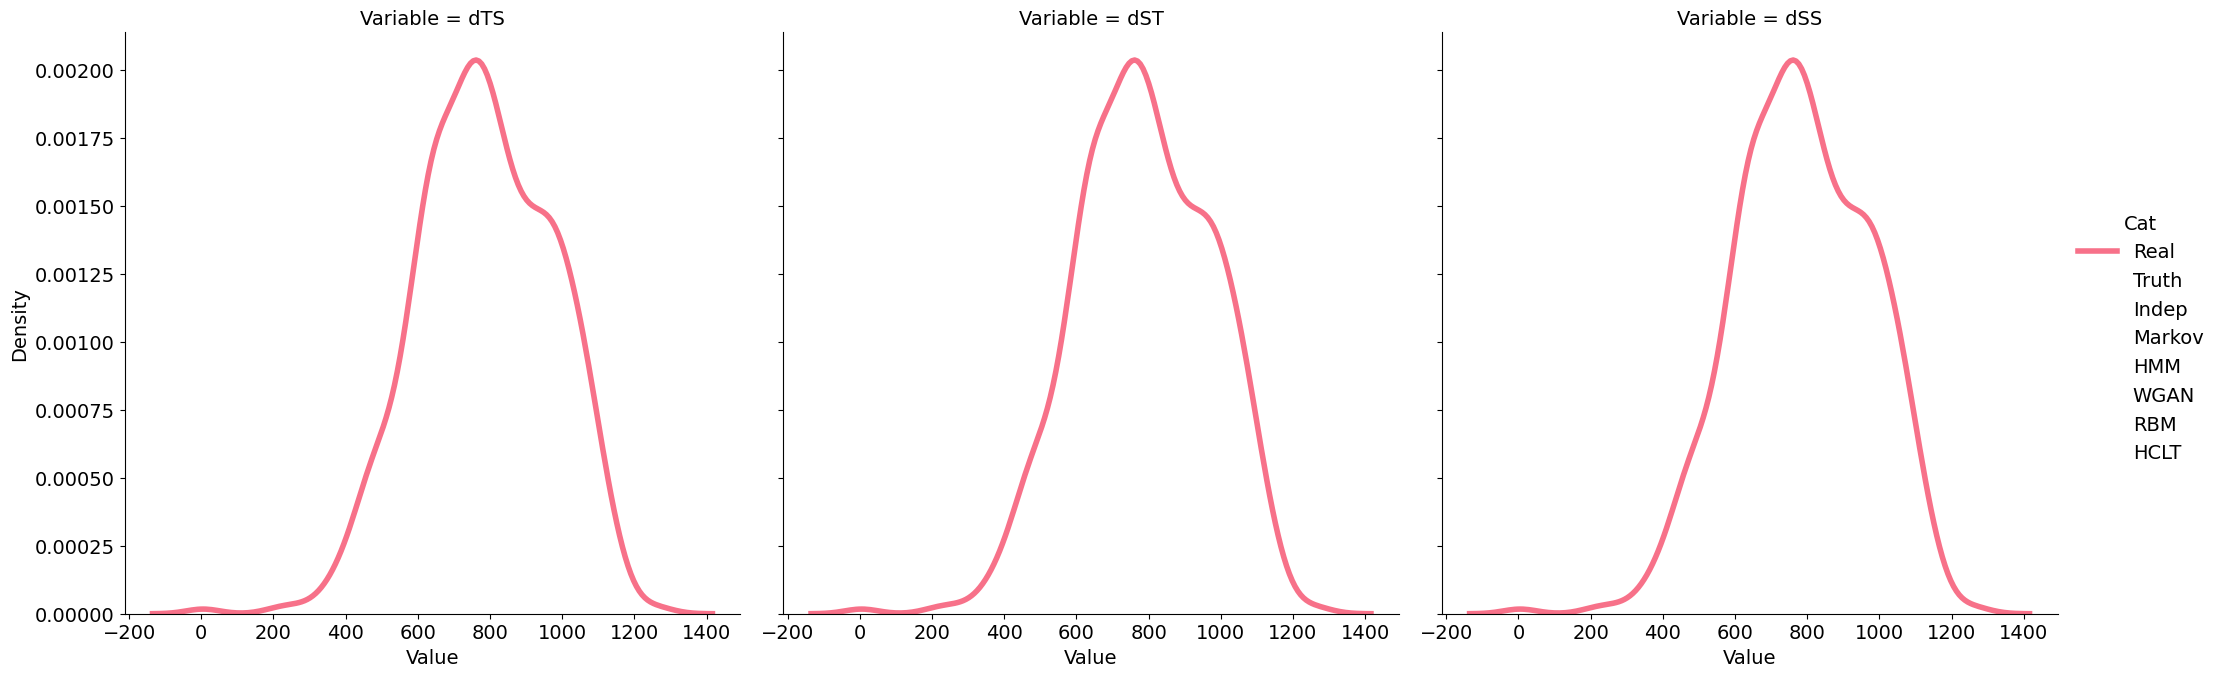

************************************************************************
*** Computation and plotting DIST/AATS DONE. Figures saved in ./FIGS/1KG/to_minor_encoding-False;min_af-0;max_af-1;allchecks-0;n-5008/ ***
************************************************************************


/tmp/ipykernel_477083/755186620.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W = W.append({'stat':'wasserstein','statistic':sc, 'pvalue':None,  'label':cat, 'comparaison':method}, ignore_index=True)
/tmp/ipykernel_477083/755186620.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W = W.append({'stat':'wasserstein','statistic':sc, 'pvalue':None,  'label':cat, 'comparaison':method}, ignore_index=True)
/tmp/ipykernel_477083/755186620.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W = W.append({'stat':'wasserstein','statistic':sc, 'pvalue':None,  'label':cat, 'comparaison':method}, ignore_index=True)
/tmp/ipykernel_477083/755186620.py:6: FutureWarning: The frame.append method is deprecated and will be removed from

In [15]:
DIST = True
AATS = True
boolComputeAATS = False # if already computed, can set this to false
%run -p {dirscript}/plotfig_utils_5_DIST_AATS.ipynb # computationally long